### 5 hyperparameters that I consider optimizing for better performance

**Learning Rate** (lr): The learning rate determines the step size at each iteration during the optimization process. It controls how quickly the model learns from the data. I experimented with different values, such as 0.001, 0.01, or 0.1, to find the optimal learning rate for my specific problem.

**Weight Decay** (weight_decay): Weight decay is a regularization technique that adds a penalty term to the loss function to prevent overfitting. It controls the amount of L2 regularization applied to the model's weights. I tried values like 0.001, 0.01, or 0.1 to find the optimal weight decay for my model.

**Number of Epochs** (num_epochs): The number of epochs determines how many times the entire training dataset is passed through the model during the training. It affects the convergence and generalization of the model. Increase the number of epochs if the model is underfitting, but I have to be cautious of overfitting.

**Batch Size** (batch_size): The batch size defines the number of samples processed by the model in each iteration. It affects the speed and stability of training. Larger batch sizes can speed up training, but they may require more memory. Smaller batch sizes can provide more noise in the parameter updates but may converge more slowly. Hence, I tried 16, 32, 64, or 128 to find the optimal batch size for my model.





## **1. Accessing and Reading the Kaggle Data Sets**

The competition data is separated into training and test sets. Each record includes the property values of the house and attributes such as street type, year of construction, roof type, basement condition.

The data includes multiple data types, including integers (year of construction), discrete labels (roof type), floating point numbers, etc.; Some data is missing and is thus labeled 'na'.

The price of each house, namely the label, is only included in the training data set (it is a competition after all). The 'Data' tab on the competition tab has links to download the data.

We will read and process the data using `pandas`, an [efficient data analysis toolkit](http://pandas.pydata.org/pandas-docs/stable/). It is already part of colab.

##Design for the Assignment


**Step 1:**

Access both the data sets from Kaggle

**Step 2:**

Ensure that the data is loaded and verified

**Step 3:**

Read the data. This will print out the number of rows and columns

**Step 4:**

Combines the selected features from the train_data and test_data dataframes into a single dataframe called all_features, excluding the first column in each dataframe. It is commonly used when merging feature data from different sources for machine learning tasks.

**Step 5:**

The first line of code normalizes the numerical features in the all_features dataframe by subtracting the mean and dividing by the standard deviation, ensuring that the features have zero mean and unit variance.

**Step 6:**

The second line of code replaces any missing values in the all_features dataframe with zeros, effectively filling in the missing data points with a default value of 0.

**Step 7:**

The first line of code performs one-hot encoding on the categorical features in the all_features dataframe, creating binary dummy variables for each unique category, including a column for missing values (NaNs).

**Step 8:**

The second line of code returns the shape of the all_features dataframe, which represents the number of rows and columns after the one-hot encoding process.

**Step 9:**

The first line of code assigns the number of training samples to the variable n_train, representing the number of rows in the train_data dataframe.

**Step 10:**

The three lines of code convert the subsets of all_features and train_data into PyTorch tensors. The train_features tensor contains the training features, the test_features tensor contains the test features, and the train_labels tensor contains the training labels. The conversion is performed to ensure compatibility with PyTorch models and operations.

**Step 11:**

creates a scatter plot with data points representing the relationship between the ground living area and sale price.

**Step 12:**

Use MLP to connect with ReLU functions

**Step 13:**

Calculate mean squared Error

**Step 14:**

creates a DataLoader from the given data arrays, with the option to specify the batch size and whether it's for training or not.





In this homework, you will build a model for predicting house prices. For this, you will use real house sale data from a [Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

My task is to:
1. Develop a better model to reduce the prediction error. You can find some hints on the last section.
2. Submit the results to Kaggle. Then insert here the screenshot of the result.

It is important that you start as earlier as possible. Tuning hyper-parameters takes time, and Kaggle limits the number of submissions per day.


**Step 1:**
Access both the data sets from Kaggle


In [ ]:
# If pandas is not installed, please uncomment the following line:
# !pip install pandas

%matplotlib inline
import os
import importlib

import time
import math
import random
import numpy as np
import torch
import pandas as pd



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision
from torch import nn
from torch.utils import data
from torchvision import transforms

def install_package(package):
    try:
        importlib.import_module(package)
    except ImportError:
        import sys
        !{sys.executable} -m pip install {package}

def is_running_in_colab():
    try:
        from google.colab import _ipython as ip
        return True
    except ImportError:
        return False

try:
  if is_running_in_colab():
    print("Running in Google Colab")
  else:
    print("Running in Jupyter or VSCode")

  import requests
  url = 'https://raw.githubusercontent.com/joccing/ICT303-assignment1/master/config.py'
  r = requests.get(url, allow_redirects=True)
  open('config.py', 'wb').write(r.content)

except ModuleNotFoundError:
  pass

from config import *
config_data()



Running in Google Colab
Finished!


**Step 2:**
Ensure that the data is loaded and verified



In [ ]:
try:
    import pandas as pd
except ImportError:
    # If pandas is not installed, install it
    install_package('pandas')
    import pandas as pd

train_data = pd.read_csv('data/train.csv')
test_data  = pd.read_csv('data/test.csv')
assert train_data.shape == (1460,81)
assert test_data.shape == (1459, 80)
print('Loaded and verified data!')

Loaded and verified data!


Download the train and test dataset from [Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) (in the Data tab). You will need to sign it to access the data. These are two Comma Separated Values (CSV) files containing training and test data respectively we use Pandas.

Save them into your google drive. To read them into your code, use the following command (from panda)

**Step 3:**
Read the data. This will print out the number of rows and columns


In [ ]:
train_data   # change the name and the path as needed
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


The training data set includes 1,460 examples, 80 features, and 1 label. The test data contains 1,459 examples and 80 features. You can check the content of the files by opening them in Excel or by using the following two commands

In [ ]:
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


Let’s take a look at the first 4 and last 2 features as well as the label (SalePrice) from the first 4 examples:

In [ ]:
#train_data.iloc[0:4, [0, 1, 2, 3, -3, -2, -1]]

We can see that in each example, the first feature is the ID. This helps the model identify each training example. While this is convenient, it doesn't carry any information for prediction purposes. Hence we remove it from the dataset before feeding the data into the network.

**Step 4:**
Combines the selected features from the train_data and test_data dataframes into a single dataframe called all_features, excluding the first column in each dataframe. It is commonly used when merging feature data from different sources for machine learning tasks.

In [ ]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

## **2. Data Preprocessing**

As stated above, we have a wide variety of datatypes. Before we feed it into a  network we need to perform some amount of processing.

Let's start with the **numerical features**. We begin by replacing missing values with the mean. This is a reasonable strategy if features are missing at random. To adjust them to a common scale we rescale them to zero mean and unit variance. This is accomplished as follows:

$$x \leftarrow \frac{x - \mu}{\sigma}.$$

This process is called **normalization** or **standardisation**. The reason for normalizing the data is that it brings all features to the same order of magnitude. After all, we do not know *a priori* which features are likely to be relevant. Hence it makes sense to treat them equally.

Write below the code that does the normalization for each numerical features:

**Step 5:**
The first line of code normalizes the numerical features in the all_features dataframe by subtracting the mean and dividing by the standard deviation, ensuring that the features have zero mean and unit variance.

**Step 6:**
The second line of code replaces any missing values in the all_features dataframe with zeros, effectively filling in the missing data points with a default value of 0.

In [ ]:
# Normalize the numerical features
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

# Set missing values to 0
all_features = all_features.fillna(0)


Next we deal with the **discrete values**. This includes variables such as 'MSZoning'. We replace them by a one-hot encoding in the same manner as how we transformed multiclass classification data into a vector of $0$ and $1$. For instance, 'MSZoning' assumes the values 'RL' and 'RM'. They map into vectors $(1,0)$ and $(0,1)$ respectively. Pandas does this automatically for us.

**Step 7:**
The first line of code performs one-hot encoding on the categorical features in the all_features dataframe, creating binary dummy variables for each unique category, including a column for missing values (NaNs).

**Step 8:**
The second line of code returns the shape of the all_features dataframe, which represents the number of rows and columns after the one-hot encoding process.


In [ ]:
# Dummy_na=True refers to a missing value being a legal eigenvalue, and creates an indicative feature for it.
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape

(2919, 354)

You can see that this conversion increases the number of features from 79 to 331.

Finally, via the `values` attribute we can extract the NumPy format from the Pandas dataframe and prepare them for training.

**Step 9:**
The first line of code assigns the number of training samples to the variable n_train, representing the number of rows in the train_data dataframe.

**Step 10:**
The  three lines of code convert the subsets of all_features and train_data into PyTorch tensors. The train_features tensor contains the training features, the test_features tensor contains the test features, and the train_labels tensor contains the training labels. The conversion is performed to ensure compatibility with PyTorch models and operations.


In [ ]:
n_train = train_data.shape[0]

# the train features are in all_features[:n_train].values - need to convert them into a pytorch tensor??
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)

# the test features are in all_features[n_train:].values - need to convert them into a pytorch tensor??
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)

# the train labels are in train_data.SalePrice.values - need to convert them into a pytorch tensor??
train_labels = torch.tensor(train_data.SalePrice.values.reshape(-1, 1), dtype=torch.float32)

**Create a scatter plot to visually examine the presence of any raw outliers in the data**

**Step 11:**creates a scatter plot with data points representing the relationship between the ground living area and sale price. The resulting plot helps visualize the distribution of data points and any potential patterns or outliers in the relationship between the variables.

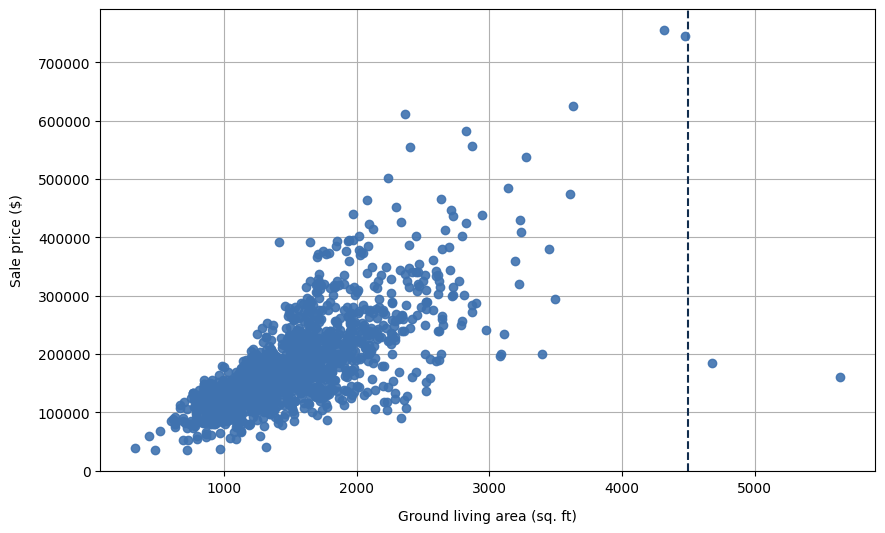

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.scatter(train_data["GrLivArea"], train_data["SalePrice"], c="#3f72af", zorder=3, alpha=0.9)
ax.axvline(4500, c="#112d4e", ls="--", zorder=2)
ax.set_xlabel("Ground living area (sq. ft)", labelpad=10)
ax.set_ylabel("Sale price ($)", labelpad=10)
plt.show()


## **3. Training**

### **3.1. Loss function**
To get started, train an MLP model with squared loss. This will obviously not lead to a competition winning submission but it provides a sanity check to see whether there's meaningful information in the data. It also amounts to a minimum baseline of how well we should expect any 'fancy' model to work.

To this end, use the codes you developed in Lab 4. However, we may need to test with a better loss function to achieve better results. In fact, house prices, like shares, are relative. That is, we probably care more about the relative error $\frac{y - \hat{y}}{y}$ than about the absolute error. For instance, getting a house price wrong by USD 100,000 is terrible in rural Ohio, where the value of the house is USD 125,000. On the other hand, if we err by this amount in Los Altos Hills, California, we can be proud of the accuracy of our model (the median house price there exceeds 4 million).

One way to address this problem is to measure the discrepancy between the predicted price and the correct price in the logarithm of the price estimates. In fact, this is also the error that is being used to measure the quality in the Kaggle competition. After all, a small value $\delta$ of $\log y - \log \hat{y}$ translates into $e^{-\delta} \leq \frac{\hat{y}}{y} \leq e^\delta$. This leads to the following loss function:

$$L = \sqrt{\frac{1}{n}\sum_{i=1}^n\left(\log y_i -\log \hat{y}_i\right)^2}.$$

### **3.2. k-Fold Cross-Validation**

To get good performance, you usually need to select the network architecture. This includes the type of network, the number of layers, the number of hidden neurons in each layer, the learning rate, the batch size, etc. These are called **hyper paramters**.

However, it is difficult to know which configuration of the hyperparameters above would achieve the best performance. Thus in practice, we need to try multiple configurations (i.e., choices of the hyperparameters), evaluate the performance of each configuration, and pick the one that gives the best performance.

To assess the performance of a given configuratation, you need to take the training set and randomly divide it into two subsets:
- one subset will be called training set (usually 80% of the entire data set),
- the second one will be called validation set (usually 20% of the entire data set.

Then, train your model on the training set and test it on the validation set. Repeat this process $k$ times and average the performance over all the run. This will then be the performance of this configuration. This process is called **$k-$fold cross validation**. $k$ is usually chosen to be $5$ or $10$.

Run this procedure for each of the configurations you defined and pick the one that gives the best performance.

To use it, first we need a function that returns the i-th fold of the data in a k-fold cross-validation procedure. It proceeds by slicing out the i-th segment as validation data and returning the rest as training data.

Note - this is not the most efficient way of handling data and we would use something much smarter if the amount of data was considerably larger. But this would obscure the function of the code considerably and we thus omit it.

**This code uses MLP nodel from PyTorch library**

**Step 12:**
Use MLP to connect with ReLU functions

- The __init__ method consist of several fully connected layers ReLU activation functions. The inputsize is the total number of features which is 354 and outputsize is 1 because we want 1 outcome. The learning rate is set to 0.01 for default.

- The loss method uses the mean squared error loss.

- The forward method implements the forward pass of the MLP. It takes an input tensor X and passes it through the sequential layers defined in the self.layers module, returning the output tensor.

- The get_net method creates an instance of the MLP model with input and output size. It create an MLP object without calling the constructor.

- Finally, an instance of the MLP model is created by calling MLP.get_net(n_inputs, n_outputs), and the resulting model is assigned to the variable net.


In [ ]:

import torch
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self, inputSize=354, outputSize=1, lr=0.001):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(inputSize, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, outputSize)
    )

  def loss(self, y_hat, y):
        fn = nn.MSELoss()
        return fn(y_hat, y)

  def forward(self, X):
        return self.layers(X)



  @staticmethod
  def get_net(inputSize, outputSize):
        net = MLP(inputSize, outputSize)
        return net

n_inputs = train_features.shape[1]
n_outputs = 1

# Create an instance of the MLP model using get_net()
net = MLP.get_net(n_inputs, n_outputs)



**Step 13:**
Calculate mean squared Error


- calculates the Root Mean Squared Error (rMSE) between the predictions made by a neural network (net) and the true labels (labels).

In [ ]:
import torch
import torch.nn.functional as F

def rmse(net, features, labels):
    preds = net(features)  # Make predictions using the neural network
    clipped_preds = torch.clamp(preds, min=1.0)  # Clamp predictions to be at least 1.0
    log_preds = torch.log(clipped_preds)  # Apply logarithm to the clipped predictions
    log_labels = torch.log(labels)  # Apply logarithm to the true labels
    mse = F.mse_loss(log_preds, log_labels)  # Calculate the mean squared error (MSE)
    rmse = torch.sqrt(mse)  # Calculate the root mean squared error (RMSE)
    return rmse.item()  # Return the RMSE as a scalar value

**Step 14:**
creates a DataLoader from the given data arrays, with the option to specify the batch size and whether it's for training or not.

-  load_data function creates a DataLoader object that load the data in batches during model training. It takes input data arrays, creates a TensorDataset from them, and put it with a DataLoader to provide functionality such as batching and shuffling.

- TensorDataset(*data_arrays): takes a collection of data arrays as input

- *data_arrays syntax is to unpack the input data arrays. Then it creates a TensorDataset object by combining the input data arrays. TensorDataset is a PyTorch class create a dataset from a collection of tensors

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

def load_data(data_arrays, batch_size, is_train=True):
    dataset = TensorDataset(*data_arrays)  # Create a TensorDataset from the data arrays
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=is_train)  # Create a DataLoader from the dataset
    return dataloader

**Step 15:**
Train trains a neural network model using the specified training and test data

**train function** performs the training loop for the neural network model, updating the parameters based on the computed gradients, and tracking the training and test losses for each epoch.

function takes several input arguments

- net (the neural network model)
- train_features (the input features for training)
- train_labels (the corresponding labels for training)
- test_features (the input features for testing/validation)
- test_labels (the corresponding labels for testing/validation)
- num_epochs (the number of epochs to train the model)
- learning_rate (the learning rate for the optimizer)
- weight_decay (the weight decay parameter for regularization)
- batch_size (the batch size for training)

**train_ls and test_ls** store the training and test losses like an array

**load_data function** is called to create a data loader train_iter using the train_features and train_labels, with the specified batch_size. The train_iter will provide batches of data for training in each iteration.

The gradients are reset to zero using optimizer.zero_grad() for each batch

**Forward pass** is performed by passing the batch of inputs (X) through the neural network model (net(X)), and the corresponding predictions are obtained

**Loss function** (loss) is called with the predicted outputs and the true labels (net(X), y) to calculate the loss value (l)

**Optimizer** takes a step (optimizer.step()) to update the model parameters using the computed gradients.

In [ ]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):

    train_ls, test_ls = [], []

    train_iter = load_data((train_features, train_labels), batch_size)
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)

    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss_fn(net(X), y)
            l.backward()
            optimizer.step()

        train_l = rmse(net, train_features, train_labels)     #training loss after the current epoch
        train_ls.append(train_l)
        #print(f'Epoch: ', epoch, ' Training Loss: ', train_l)
        if test_labels is not None:
            test_l = rmse(net, test_features, test_labels)    #test loss after the current epoch
            test_ls.append(test_l)

    return train_ls, test_ls




**Step 16:**
implements k-fold cross-validation by splitting the given dataset (X, y) into training and validation sets based on the specified fold index (i) out of k folds.


In [ ]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j*fold_size, (j+1)*fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

The training and verification error averages are returned when we train $k$ times in the k-fold cross-validation.

In [ ]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        #net = MLP.get_net()
        net = MLP.get_net(inputSize=X_train.shape[1], outputSize=1)  # Pass the inputSize and outputSize arguments

        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate, weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            plt.plot(list(range(1, num_epochs + 1)), train_ls)
            plt.plot(list(range(1, num_epochs + 1)), valid_ls)
            plt.xlabel('epoch')
            plt.ylabel('rmse')
            plt.legend(['train', 'valid'])
            plt.yscale('log')
            plt.show()
        #print(f'Fold {i+1}，training loss {float(train_ls[-1]):f}, validation loss {float(valid_ls[-1]):f}')
        print('fold %d, train rmse: %f, valid rmse: %f' % (
            i, train_ls[-1], valid_ls[-1]))


    return train_l_sum / k, valid_l_sum / k

Finding a good choice of the hyperparameters can take quite some time, depending on how many things one wants to optimize over. Within reason the $k$-fold crossvalidation approach is resilient against multiple testing. However, if we were to try out an unreasonably large number of options it might fail since we might just get lucky on the validation split with a particular set of hyperparameters.

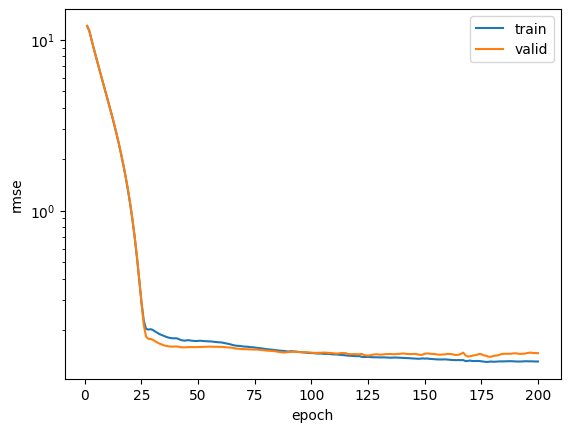

fold 0, train rmse: 0.130963, valid rmse: 0.146464
fold 1, train rmse: 0.128325, valid rmse: 0.147151
fold 2, train rmse: 0.126977, valid rmse: 0.143823
fold 3, train rmse: 0.132329, valid rmse: 0.136413
fold 4, train rmse: 0.123861, valid rmse: 0.167534
5-fold validation: avg train rmse: 0.128491, avg valid rmse: 0.148277


In [ ]:
k, num_epochs, lr, weight_decay, batch_size = 5, 200, 0.001, 0.01, 128
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print('%d-fold validation: avg train rmse: %f, avg valid rmse: %f'
      % (k, train_l, valid_l))


You will notice that sometimes the number of training errors for a set of hyper-parameters can be very low, while the number of errors for the $k$-fold cross validation may be higher. This is most likely a consequence of overfitting. Therefore, when we reduce the amount of training errors, we need to check whether the amount of errors in the k-fold cross-validation have also been reduced accordingly.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


def save_to_csv(data, folder_path, file_name):
    csv_file_path = folder_path + '/' + file_name
    data.to_csv(csv_file_path, index=False)

net = MLP.get_net(train_features.shape[1], 1)
train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)

preds = net(test_features).detach().numpy()
test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])

submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)

folder_path = '/content/drive/My Drive/ICT303/Assignment1.6'
file_name = 'Assignment1.csv'

save_to_csv(submission, folder_path, file_name)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



##  **4. Predict and Submit**

Once you have figured out what a good choice of hyperparameters should be, you might as well use all the data to train on it (rather than just $1-1/k$ of the data that is used in the crossvalidation slices). The model that we obtain in this way can then be applied to the test set. Saving the estimates in a CSV file will simplify uploading the results to Kaggle.

So your task here is that once you have decided what are the best hyperparameters, train on the entire Kaggle training set, test it on the Kaggle test set, save the result as a .csv file and submit it to Kaggle. The steps are quite simple:
* Log in to the Kaggle website and visit the House Price Prediction Competition page.
* Click the “Submit Predictions” or “Late Submission” button on the right.
* Click the “Upload Submission File” button in the dashed box at the bottom of the page and select the prediction file you wish to upload.
* Click the “Make Submission” button at the bottom of the page to view your results.

You need to include a screenshot of your results in the assignment submission.



---

